# Simulating the uncertainty of sample correlation estimator

Assume that we want to examine the properties of the sample covariance estimator, in particular we want to look at the distribution of the correlations. We assume the correlation matrix $\boldsymbol{C}$

$$
\boldsymbol{C} = \begin{pmatrix} 1 & \rho & \rho  & \rho & \rho \\
\rho & 1 & \rho  & \rho & \rho \\
\rho & \rho & 1  & \rho & \rho \\
\rho & \rho & \rho  & 1 & \rho \\
\rho & \rho & \rho  & \rho & 1 \end{pmatrix}
$$

In [1]:
# import numpy for working with matrices
import numpy as np

# import matplotlib for plotting
import matplotlib.pyplot as plt

## Problem 1

Assume $\rho = 0.5$ and that the data generating process is normal 

$$
\mathbf{X} \sim N(\mathbf{0}, \boldsymbol{C})
$$

Simulate $N=25$ observations $10\;000$ times and plot the histogram of the correlation estimates for the first and second variable. 

### Solution

In [2]:
# define input parameters
rho = 0.5
num_var = 5
num_obs = 25
num_sim = 10_000

# define the correlation matrix
corr_mat = np.full((num_var, num_var), rho)
np.fill_diagonal(corr_mat, 1.0)

# define the mean-vector 
mean_vec = np.zeros(num_var)

In [3]:
corr_mat

array([[1. , 0.5, 0.5, 0.5, 0.5],
       [0.5, 1. , 0.5, 0.5, 0.5],
       [0.5, 0.5, 1. , 0.5, 0.5],
       [0.5, 0.5, 0.5, 1. , 0.5],
       [0.5, 0.5, 0.5, 0.5, 1. ]])

In [4]:
# simulate data from a multivariate normal distribution 
sim_data = np.random.multivariate_normal(mean_vec, corr_mat, (num_sim, num_obs))

# calculate covariance matrices
estimated_covariances_matrices = [np.cov(sim_data[i], rowvar=False) for i in range(num_sim)]

# calculate correlation matrices
estimated_correlation_matrices = [ 1 / np.outer(np.sqrt(np.diag(c)), np.sqrt(np.diag(c))) * c for c in estimated_covariances_matrices] 

In [5]:
np.array(estimated_correlation_matrices)[:, 0, 1]

array([0.72116486, 0.48487243, 0.31669749, ..., 0.58872716, 0.48910879,
       0.44125078], shape=(10000,))

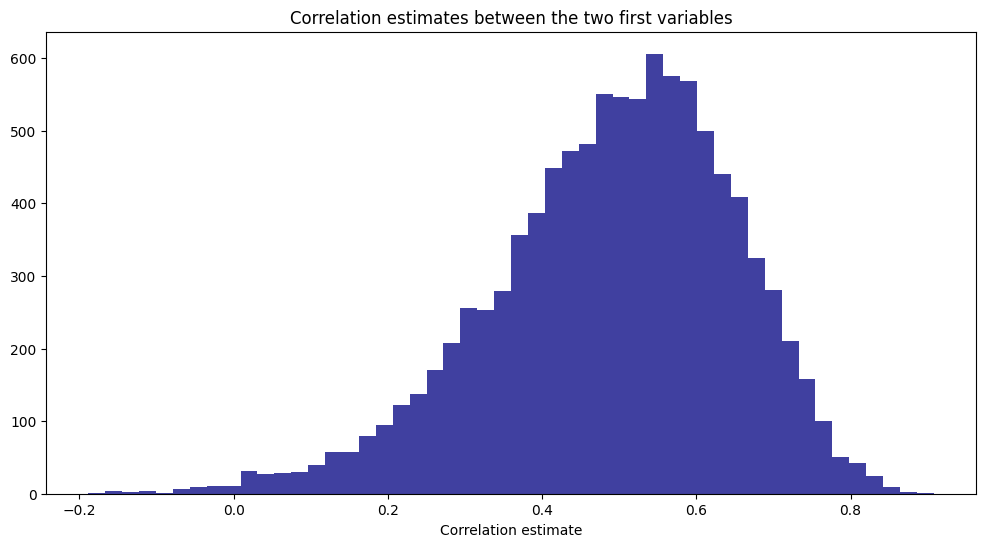

In [6]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(np.array(estimated_correlation_matrices)[:, 0, 1], bins=50, color="navy", alpha=0.75)
ax.set(xlabel="Correlation estimate", title="Correlation estimates between the two first variables"); 

## Problem 2

What happens if we increase $\rho$?

### Solution

In [7]:
# define input parameters
rho = 0.9
num_var = 5
num_obs = 25
num_sim = 10_000

# define the correlation matrix
corr_mat_rho_up = np.full((num_var, num_var), rho)
np.fill_diagonal(corr_mat_rho_up, 1.0)

# define the mean-vector 
mean_vec = np.zeros(num_var)

In [8]:
# simulate data from a multivariate normal distribution 
sim_data_rho_up = np.random.multivariate_normal(mean_vec, corr_mat_rho_up, (num_sim, num_obs))

# calculate covariance matrices
estimated_covariances_matrices_rho_up = [np.cov(sim_data_rho_up[i], rowvar=False) for i in range(num_sim)]

# calculate correlation matrices
estimated_correlation_matrices_rho_up = [ 1 / np.outer(np.sqrt(np.diag(c)), np.sqrt(np.diag(c))) * c for c in estimated_covariances_matrices_rho_up] 

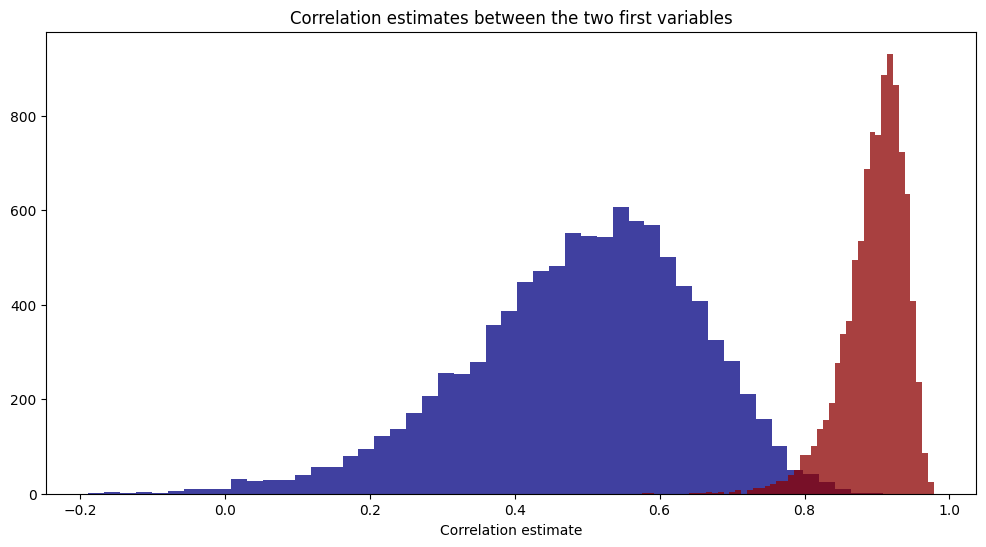

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(np.array(estimated_correlation_matrices)[:, 0, 1], bins=50, color="navy", alpha=0.75)
plt.hist(np.array(estimated_correlation_matrices_rho_up)[:, 0, 1], bins=50, color="darkred", alpha=0.75)
ax.set(xlabel="Correlation estimate", title="Correlation estimates between the two first variables"); 

## Problem 3

What happens if you apply the [Fisher transformation](https://en.wikipedia.org/wiki/Fisher_transformation) $z = \frac{1}{2} \ln \frac{1 + \hat{\rho}}{1 - \hat{\rho}} = \text{artanh}(\hat{\rho})$?

### Solution

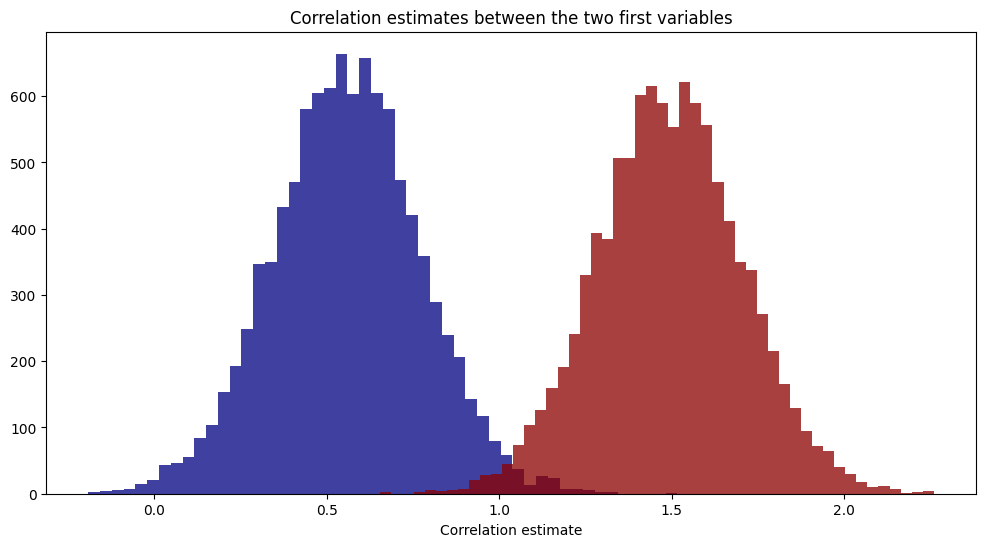

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
plt.hist(np.arctanh(np.array(estimated_correlation_matrices)[:, 0, 1]), bins=50, color="navy", alpha=0.75)
plt.hist(np.arctanh(np.array(estimated_correlation_matrices_rho_up)[:, 0, 1]), bins=50, color="darkred", alpha=0.75)
ax.set(xlabel="Correlation estimate", title="Correlation estimates between the two first variables"); 